In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [70]:
from datetime import datetime as dt
from scipy import stats
import pylab
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [4]:
df = pd.read_csv('1828259.csv')

In [5]:
df.head(4)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200718130,SYSCO F trust,2019-04-02 00:00:00,2019.0,1.928992e+09,2019-03-19,20190319,20190319,20190403.0,USD,RV,1.0,NaN,12568.57,20190319.0,NAA8,1.928992e+09,0
1,U001,0200756072,REINHA trust,2019-10-15 00:00:00,2019.0,1.929891e+09,2019-09-19,20190918,20190919,20191004.0,USD,RV,1.0,NaN,18529.02,20190919.0,NAA8,1.929891e+09,0
2,U002,0200501669,WAL MA,2020-02-21 00:00:00,2020.0,1.990569e+09,2020-01-11,20200109,20200111,20200215.0,USD,RV,1.0,NaN,8807.20,20200111.0,NAG2,1.990569e+09,0
3,U001,0200790107,ROU corporation,2019-10-30 00:00:00,2019.0,1.930010e+09,2019-10-15,20191014,20191015,20191030.0,USD,RV,1.0,NaN,38797.25,20191015.0,NAC6,1.930010e+09,0


In [6]:
df.isna().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                 3494
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    5
isOpen                        0
dtype: int64

In [7]:
print(df.dtypes)

business_code              object
cust_number                object
name_customer              object
clear_date                 object
buisness_year             float64
doc_id                    float64
posting_date               object
document_create_date        int64
document_create_date.1      int64
due_in_date               float64
invoice_currency           object
document type              object
posting_id                float64
area_business             float64
total_open_amount         float64
baseline_create_date      float64
cust_payment_terms         object
invoice_id                float64
isOpen                      int64
dtype: object


In [8]:
df.shape

(50000, 19)

In [9]:
df['document_create_date'][1]

20190918

In [10]:
df.drop(columns='area_business',inplace=True)

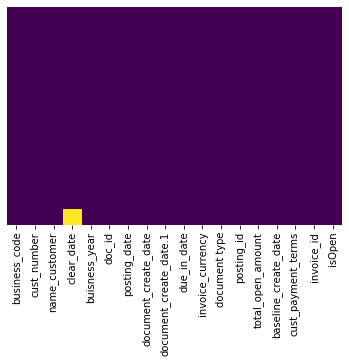

In [11]:
sns.heatmap(df.isna(),yticklabels=False,cbar=False,cmap='viridis')

In [12]:
# as u can see we have some missing data on clear date

In [13]:
df['same']= np.where(df['document_create_date.1']==df['document_create_date'],1,0)


In [14]:
df['same']

0        1
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    1
49999    0
Name: same, Length: 50000, dtype: int32

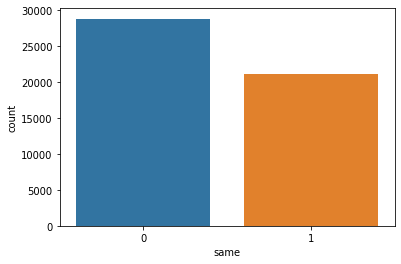

In [15]:
sns.countplot(x=df['same'])

In [16]:
df.groupby('cust_payment_terms').count()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,invoice_id,isOpen,same
cust_payment_terms,,,,,,,,,,,,,,,,,,
90M7,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
B052,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
B112,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
BR12,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
BR56,9,9,9,8,9,9,9,9,9,9,9,9,9,9,9,9,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NAWM,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
NAWN,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118
NAWP,91,91,91,87,91,91,91,91,91,91,91,91,91,91,91,91,91,91


In [17]:
df.dropna(how='all',axis =1)# to drop colmns with all null if any
df.drop_duplicates(keep='first')
df.shape

(50000, 19)

In [33]:
df.cust_number.nunique()

1461

In [34]:
df.cust_number.unique()

array(['0200704858', '0140103480', '0100033558', ..., '0200750131',
       '100012181', '200727272'], dtype=object)

In [35]:
df.name_customer.nunique()

4317

In [36]:
df.clear_date.nunique()

403

In [18]:
df.business_code.nunique()

6

In [19]:
df.business_code.unique()

array(['U001', 'U002', 'CA02', 'U013', 'U005', 'U007'], dtype=object)

In [20]:
new_dict = {k: i for i, k in enumerate(df.business_code.unique(), 0)}
df.loc[:, 'business_code_mapped'] = df.loc[:, 'business_code'].map(new_dict)    #category wise/categorical mapping of business code

In [21]:
df.head(3)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,same,business_code_mapped
0,U001,0200718130,SYSCO F trust,2019-04-02 00:00:00,2019.0,1.928992e+09,2019-03-19,20190319,20190319,20190403.0,USD,RV,1.0,12568.57,20190319.0,NAA8,1.928992e+09,0,1,0
1,U001,0200756072,REINHA trust,2019-10-15 00:00:00,2019.0,1.929891e+09,2019-09-19,20190918,20190919,20191004.0,USD,RV,1.0,18529.02,20190919.0,NAA8,1.929891e+09,0,0,0
2,U002,0200501669,WAL MA,2020-02-21 00:00:00,2020.0,1.990569e+09,2020-01-11,20200109,20200111,20200215.0,USD,RV,1.0,8807.20,20200111.0,NAG2,1.990569e+09,0,0,1


In [22]:
df = df.sort_values(['clear_date'],ascending=True) #sort the given data in terms of clear date

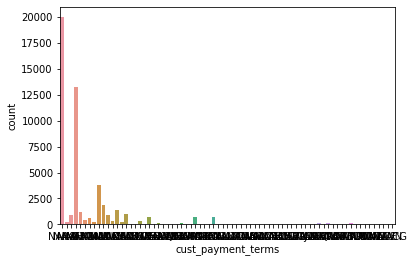

In [23]:
sns.countplot(x='cust_payment_terms',data=df)       #counting the values in cust_payment_terms

In [24]:
df.drop(['cust_payment_terms'],axis=1,inplace=True)   #deleting cust_payment_term as it has many part of data similar.

In [25]:
df.shape

(50000, 19)

In [26]:
# Creating correlation matrix
corr_matrix = df.corr().abs()

In [27]:

corr_matrix 

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,total_open_amount,baseline_create_date,invoice_id,isOpen,same,business_code_mapped
buisness_year,1.000000,0.007070,0.964593,0.974421,0.983260,NaN,0.001150,0.974924,0.006011,0.564440,0.000320,0.011658
doc_id,0.007070,1.000000,0.003457,0.005886,0.008818,NaN,0.174518,0.002799,1.000000,0.000073,0.295141,0.816095
document_create_date,0.964593,0.003457,1.000000,0.989140,0.958891,NaN,0.000327,0.987869,0.002130,0.575916,0.011988,0.010678
document_create_date.1,0.974421,0.005886,0.989140,1.000000,0.967804,NaN,0.001576,0.998720,0.004593,0.575739,0.004617,0.011339
due_in_date,0.983260,0.008818,0.958891,0.967804,1.000000,NaN,0.002338,0.969051,0.007542,0.564983,0.000497,0.012877
posting_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_open_amount,0.001150,0.174518,0.000327,0.001576,0.002338,NaN,1.000000,0.001183,0.182797,0.003797,0.089223,0.136235
baseline_create_date,0.974924,0.002799,0.987869,0.998720,0.969051,NaN,0.001183,1.000000,0.001393,0.575626,0.005111,0.008672
invoice_id,0.006011,1.000000,0.002130,0.004593,0.007542,NaN,0.182797,0.001393,1.000000,0.000666,0.308089,0.838146
isOpen,0.564440,0.000073,0.575916,0.575739,0.564983,NaN,0.003797,0.575626,0.000666,1.000000,0.003163,0.008603


In [28]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [29]:
to_drop = [column for column in upper.columns if any(upper[column] ==1)]
print(to_drop)

['invoice_id']


In [30]:
#droping the correlated/duplicate colums
df=df.drop(columns=['invoice_id'])
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,isOpen,same,business_code_mapped
19389,U001,0200704858,WAKE trust,2019-01-03 00:00:00,2019.0,1.928550e+09,2019-01-02,20190102,20190102,20190117.0,USD,RV,1.0,816.14,20190102.0,0,1,0
7240,U013,0140103480,PRIC foundation,2019-01-04 00:00:00,2019.0,1.991820e+09,2019-01-04,20190104,20190104,20190218.0,USD,RV,1.0,1898.40,20190104.0,0,1,3
41526,U001,0100033558,TRI- foundation,2019-01-07 00:00:00,2019.0,1.928535e+09,2018-12-30,20181231,20181230,20190203.0,USD,RV,1.0,15677.60,20181230.0,0,0,0
18169,U001,0200793830,M co,2019-01-07 00:00:00,2019.0,1.928543e+09,2018-12-30,20181230,20181230,20190114.0,USD,RV,1.0,35599.61,20181230.0,0,1,0
35032,U001,0200769556,SHAM associates,2019-01-08 00:00:00,2019.0,1.928497e+09,2018-12-31,20181231,20181231,20190115.0,USD,RV,1.0,23140.68,20181231.0,0,1,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 19389 to 49999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              46506 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  total_open_amount       50000 non-null  float64
 14  baseline_create_date    50000 non-

In [60]:
df['new_due_in_date']=pd.to_datetime(df['due_in_date'],format='%Y%m%d')

In [61]:
df['new_due_in_date']

19389   2019-01-17
7240    2019-02-18
41526   2019-02-03
18169   2019-01-14
35032   2019-01-15
           ...    
49995   2020-04-05
49996   2020-05-19
49997   2020-04-22
49998   2020-04-02
49999   2020-04-25
Name: new_due_in_date, Length: 50000, dtype: datetime64[ns]

In [59]:
df.new_due_in_date.dt.day

19389    1
7240     1
41526    1
18169    1
35032    1
        ..
49995    1
49996    1
49997    1
49998    1
49999    1
Name: new_due_in_date, Length: 50000, dtype: int64

In [52]:
type(df['new_due_in_date'][1])

pandas._libs.tslibs.timestamps.Timestamp

In [41]:
df['new_clear_date']=pd.to_datetime(df['clear_date'])
df['new_clear_date']

19389   2019-01-03
7240    2019-01-04
41526   2019-01-07
18169   2019-01-07
35032   2019-01-08
           ...    
49995          NaT
49996          NaT
49997          NaT
49998          NaT
49999          NaT
Name: new_clear_date, Length: 50000, dtype: datetime64[ns]

In [53]:
type(df['new_clear_date'][1])

pandas._libs.tslibs.timestamps.Timestamp

In [63]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,isOpen,same,business_code_mapped,new_due_in_date,new_clear_date
19389,U001,0200704858,WAKE trust,2019-01-03 00:00:00,2019.0,1.928550e+09,2019-01-02,20190102,20190102,20190117.0,USD,RV,1.0,816.14,20190102.0,0,1,0,2019-01-17,2019-01-03
7240,U013,0140103480,PRIC foundation,2019-01-04 00:00:00,2019.0,1.991820e+09,2019-01-04,20190104,20190104,20190218.0,USD,RV,1.0,1898.40,20190104.0,0,1,3,2019-02-18,2019-01-04
41526,U001,0100033558,TRI- foundation,2019-01-07 00:00:00,2019.0,1.928535e+09,2018-12-30,20181231,20181230,20190203.0,USD,RV,1.0,15677.60,20181230.0,0,0,0,2019-02-03,2019-01-07
18169,U001,0200793830,M co,2019-01-07 00:00:00,2019.0,1.928543e+09,2018-12-30,20181230,20181230,20190114.0,USD,RV,1.0,35599.61,20181230.0,0,1,0,2019-01-14,2019-01-07
35032,U001,0200769556,SHAM associates,2019-01-08 00:00:00,2019.0,1.928497e+09,2018-12-31,20181231,20181231,20190115.0,USD,RV,1.0,23140.68,20181231.0,0,1,0,2019-01-15,2019-01-08


In [62]:
(df['new_due_in_date']>df['new_clear_date']).sum()

17036

In [65]:
df['new_clear_date']-df['new_due_in_date'].isna()

19389   2019-01-03
7240    2019-01-04
41526   2019-01-07
18169   2019-01-07
35032   2019-01-08
           ...    
49995          NaT
49996          NaT
49997          NaT
49998          NaT
49999          NaT
Length: 50000, dtype: datetime64[ns]

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 19389 to 49999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           50000 non-null  object        
 1   cust_number             50000 non-null  object        
 2   name_customer           50000 non-null  object        
 3   clear_date              46506 non-null  object        
 4   buisness_year           50000 non-null  float64       
 5   doc_id                  50000 non-null  float64       
 6   posting_date            50000 non-null  object        
 7   document_create_date    50000 non-null  int64         
 8   document_create_date.1  50000 non-null  int64         
 9   due_in_date             50000 non-null  float64       
 10  invoice_currency        50000 non-null  object        
 11  document type           50000 non-null  object        
 12  posting_id              50000 non-null  fl

In [76]:
df.groupby('invoice_currency').count()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,document type,posting_id,total_open_amount,baseline_create_date,isOpen,same,business_code_mapped,new_due_in_date,new_clear_date,n_total_open_amount
invoice_currency,,,,,,,,,,,,,,,,,,,,
CAD,3918,3918,3918,3644,3918,3918,3918,3918,3918,3918,3918,3918,3918,3918,3918,3918,3918,3918,3644,3918
USD,46082,46082,46082,42862,46082,46082,46082,46082,46082,46082,46082,46082,46082,46082,46082,46082,46082,46082,42862,46082


In [77]:
invoice_currency = df['invoice_currency']
invoice_currency = pd.get_dummies(invoice_currency, drop_first=True)

In [79]:
clear_date=df[df['new_clear_date'].isna()]

In [80]:
clear_date

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,document type,posting_id,total_open_amount,baseline_create_date,isOpen,same,business_code_mapped,new_due_in_date,new_clear_date,n_total_open_amount
46506,U001,0200707005,KING S llc,NaN,2020.0,1.930582e+09,2020-03-02,20200229,20200302,20200317.0,...,RV,1.0,48580.92,20200302.0,1,0,0,2020-03-17,NaT,47.605534
46507,U001,0200743618,MASON foundation,NaN,2020.0,1.930723e+09,2020-03-30,20200330,20200330,20200414.0,...,RV,1.0,3004.40,20200330.0,1,1,0,2020-04-14,NaT,23.055785
46508,U001,0200769623,WAL-MAR trust,NaN,2020.0,1.930624e+09,2020-03-08,20200309,20200308,20200323.0,...,RV,1.0,45269.49,20200308.0,1,0,0,2020-03-23,NaT,46.769366
46509,U001,0200762950,HAR us,NaN,2020.0,1.930813e+09,2020-04-22,20200422,20200422,20200507.0,...,RV,1.0,44366.40,20200422.0,1,1,0,2020-05-07,NaT,46.533175
46510,U001,0200707822,PUBLI,NaN,2020.0,1.930863e+09,2020-05-05,20200506,20200505,20200520.0,...,RV,1.0,95749.28,20200505.0,1,0,0,2020-05-20,NaT,56.372977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,200772670,ASSOCIAT corporation,NaN,2020.0,1.930679e+09,2020-03-21,20200320,20200321,20200405.0,...,RV,1.0,6432.94,20200321.0,1,0,0,2020-04-05,NaT,28.296337
49996,U001,0200936373,SUPE co,NaN,2020.0,1.930858e+09,2020-05-04,20200505,20200504,20200519.0,...,RV,1.0,45138.66,20200504.0,1,0,0,2020-05-19,NaT,46.735376
49997,U001,0100031704,DELHAIZE corp,NaN,2020.0,1.930750e+09,2020-04-07,20200405,20200407,20200422.0,...,RV,1.0,18644.26,20200407.0,1,0,0,2020-04-22,NaT,37.341176
49998,U001,0200721222,GO in,NaN,2020.0,1.930667e+09,2020-03-18,20200318,20200318,20200402.0,...,RV,1.0,102230.02,20200318.0,1,1,0,2020-04-02,NaT,57.293859


In [82]:
final = df.dropna(axis=0,how='any')
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46506 entries, 19389 to 32535
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           46506 non-null  object        
 1   cust_number             46506 non-null  object        
 2   name_customer           46506 non-null  object        
 3   clear_date              46506 non-null  object        
 4   buisness_year           46506 non-null  float64       
 5   doc_id                  46506 non-null  float64       
 6   posting_date            46506 non-null  object        
 7   document_create_date    46506 non-null  int64         
 8   document_create_date.1  46506 non-null  int64         
 9   due_in_date             46506 non-null  float64       
 10  invoice_currency        46506 non-null  object        
 11  document type           46506 non-null  object        
 12  posting_id              46506 non-null  fl

In [83]:
final.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,document type,posting_id,total_open_amount,baseline_create_date,isOpen,same,business_code_mapped,new_due_in_date,new_clear_date,n_total_open_amount
19389,U001,0200704858,WAKE trust,2019-01-03 00:00:00,2019.0,1.928550e+09,2019-01-02,20190102,20190102,20190117.0,...,RV,1.0,816.14,20190102.0,0,1,0,2019-01-17,2019-01-03,15.962390
7240,U013,0140103480,PRIC foundation,2019-01-04 00:00:00,2019.0,1.991820e+09,2019-01-04,20190104,20190104,20190218.0,...,RV,1.0,1898.40,20190104.0,0,1,3,2019-02-18,2019-01-04,20.311621
41526,U001,0100033558,TRI- foundation,2019-01-07 00:00:00,2019.0,1.928535e+09,2018-12-30,20181231,20181230,20190203.0,...,RV,1.0,15677.60,20181230.0,0,0,0,2019-02-03,2019-01-07,35.713271
18169,U001,0200793830,M co,2019-01-07 00:00:00,2019.0,1.928543e+09,2018-12-30,20181230,20181230,20190114.0,...,RV,1.0,35599.61,20181230.0,0,1,0,2019-01-14,2019-01-07,44.022798
35032,U001,0200769556,SHAM associates,2019-01-08 00:00:00,2019.0,1.928497e+09,2018-12-31,20181231,20181231,20190115.0,...,RV,1.0,23140.68,20181231.0,0,1,0,2019-01-15,2019-01-08,39.463567


In [85]:
final 

SyntaxError: invalid syntax (<ipython-input-85-6dd74ab0bb51>, line 1)